In [1]:
from pathlib import Path

import util
from util import workflow

browser = False
file = util.notebook_file() if util.is_notebook() else __file__
tag = util.file_tag(file)
root_path = Path("..")

In [2]:
from util import p_

import automech

mech0 = automech.io.read(
    p_.original_mechanism(tag, ext="json", path=p_.data(root_path))
)
mech = automech.io.read(
    p_.mechanism(tag, ext="json", path=p_.data(root_path))
)
print(automech.reaction_count(mech0))
print(automech.reaction_count(mech))

automech.display(mech)

5
6


In [2]:
# # Build
# from automol.graph import enum

# import automech
# from automech.species import Species

# par_mech = workflow.read_parent_mechanism(root_path=root_path)
# mech = automech.from_smiles(spc_smis=["C1=CCCC1", "C12C(O2)CCC1"], src_mech=par_mech)
# #  - enumerate HO2 abstractions from *ene* and *1-2epoxy*
# mech = automech.enumerate_reactions(
#     mech,
#     enum.ReactionSmarts.abstraction,
#     rcts_=[["C1=CCCC1", "C12C(O2)CCC1"], "O[O]"],
#     spc_col_=Species.smiles,
#     src_mech=par_mech,
# )

# # Drop reactions that we can't handle for some reason
# mech = automech.drop_reactions_by_smiles(
#     # >> all TSs converge to VDW SPs:
#     mech, rxn_smis=["C12C(O2)CCC1.O[O]>>[C]12C(O2)CCC1.OO"]
# )

# automech.display(mech)

In [3]:
# # Write
# workflow.write(mech=mech, tag=tag, root_path=root_path, browser=browser)

In [4]:
# # Read
# workflow.prepare_simulation(tag=tag, root_path=root_path)

name: C5H8(522)
smiles: C1=CCCC1


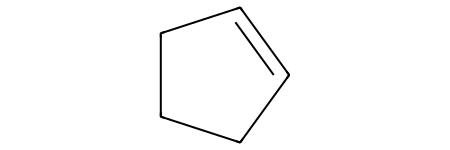

alt.LayerChart(...)

name: C5H8O(825)rs
smiles: C1C[C@H]2[C@@H](C1)O2


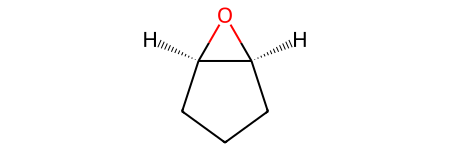

alt.LayerChart(...)

name: CPT(563)
smiles: C1CCCC1


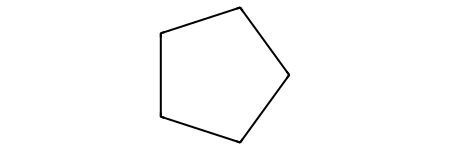

alt.LayerChart(...)

name: O2(6)
smiles: O=O


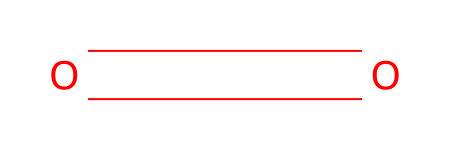

alt.LayerChart(...)

name: H2(2)
smiles: [H][H]


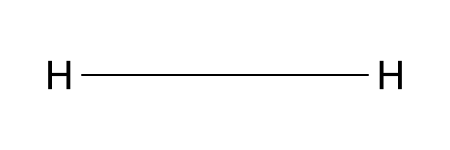

alt.LayerChart(...)

name: H2O(5)
smiles: O


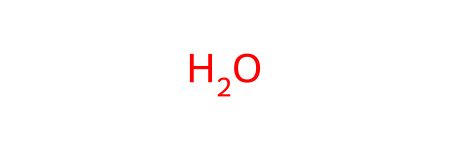

alt.LayerChart(...)

name: CO(12)
smiles: O=[C]


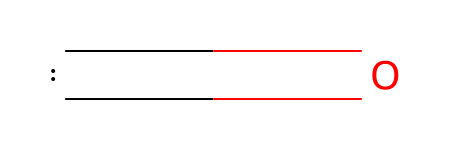

alt.LayerChart(...)

name: CO2(13)
smiles: O=C=O


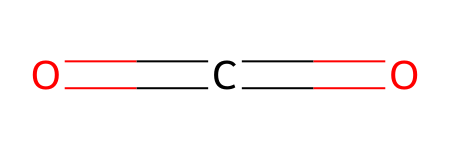

alt.LayerChart(...)

name: CH4(33)
smiles: C


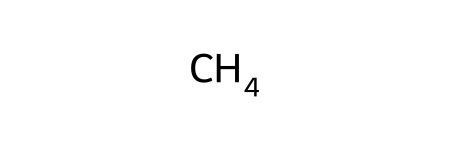

alt.LayerChart(...)

name: CH3CHO(41)
smiles: O=CC


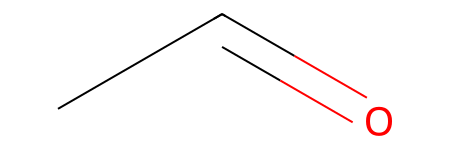

alt.LayerChart(...)

name: C2H4(52)
smiles: C=C


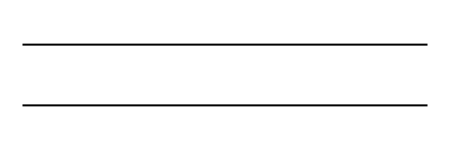

alt.LayerChart(...)

name: C3H6(131)
smiles: CC=C


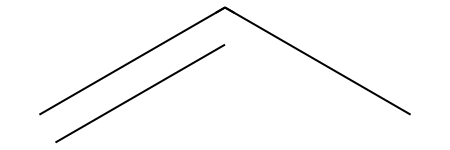

alt.LayerChart(...)

name: C3H4O(165)
smiles: O=CC=C


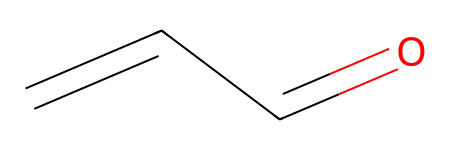

alt.LayerChart(...)

name: C4H6(227)
smiles: C=CC=C


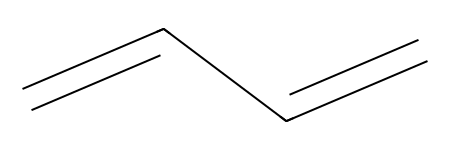

alt.LayerChart(...)

name: C4H8(253)
smiles: CCC=C


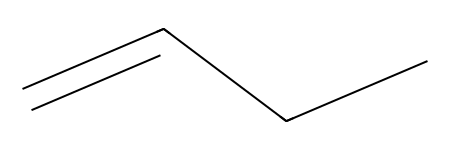

alt.LayerChart(...)

name: C5H6(478)
smiles: C1C=CC=C1


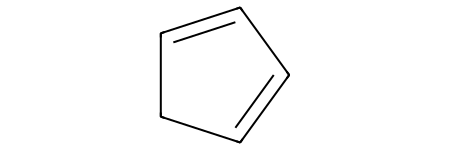

alt.LayerChart(...)

name: C6H6(970)
smiles: C1=CC=CC=C1


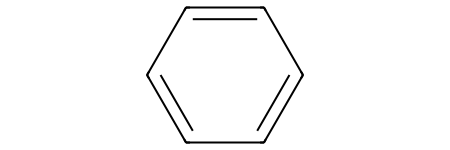

alt.LayerChart(...)

In [5]:
from util import p_

import automech

# Plot
chart_dct = workflow.plot_simulation(
    tag=tag,
    x_col="O2_molecules",
    root_path=root_path,
    line_source_=["Hill", "Lokachari"],
    point_source="Experiment",
    control=False,
)
mech = automech.io.read(
    p_.full_calculated_mechanism(tag, "json", path=p_.data(root_path))
)
for name, chart in chart_dct.items():
    automech.display_species(mech, [name])
    chart.show()

In [6]:
# Write
workflow.plot_rates(tag=tag, root_path=root_path)


Reading mechanisms...

Compare calculated mechanism to parent mechanism...

*********
Reaction: C5H8(522) + HO2(8) = C5H7(500) + H2O2(10)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[O]O']
    products = ['C1=CCC[CH]1', 'OO']
Rate parameters:
  This work:
    C5H8(522) + HO2(8) = C5H7(500) + H2O2(10)                    3.708      3.697       9164
  Hill:
    C5H8(522) + HO2(8) = C5H7(500) + H2O2(10)                   0.7820      3.968      11702


alt.Chart(...)


*********
Reaction: S(1289)rs + H2O2(10) = C5H8O(825)rs + HO2(8)
Translations:
  smiles:
    reactants = ['[CH]1C[C@H]2[C@@H](C1)O2', 'OO']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[O]O']
Rate parameters:
  This work:
    S(1289)rs + H2O2(10) = C5H8O(825)rs + HO2(8)              0.003289      4.295      652.0


alt.Chart(...)


*********
Reaction: C5H7(504) + H2O2(10) = C5H8(522) + HO2(8)
Translations:
  smiles:
    reactants = ['C1=CC[CH]C1', 'OO']
    products = ['C1=CCCC1', '[O]O']
Rate parameters:
  This work:
    C5H7(504) + H2O2(10) = C5H8(522) + HO2(8)                   0.6870      3.681       2056


alt.Chart(...)


*********
Reaction: C5H7(1202) + H2O2(10) = C5H8(522) + HO2(8)
Translations:
  smiles:
    reactants = ['[C]1=CCCC1', 'OO']
    products = ['C1=CCCC1', '[O]O']
Rate parameters:
  This work:
    C5H7(1202) + H2O2(10) = C5H8(522) + HO2(8)                   82.98      3.174      -2985


alt.Chart(...)


*********
Reaction: C5H7O(758)rs1 + H2O2(10) = C5H8O(825)rs + HO2(8)
Translations:
  smiles:
    reactants = ['[CH]1CC[C@H]2[C@@H]1O2', 'OO']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[O]O']
Rate parameters:
  This work:
    C5H7O(758)rs1 + H2O2(10) = C5H8O(825)rs + HO2(8)           0.05184      3.882       2155


alt.Chart(...)


*********
Reaction: C5H7O(758)rs0 + H2O2(10) = C5H8O(825)rs + HO2(8)
Translations:
  smiles:
    reactants = ['[CH]1CC[C@@H]2[C@H]1O2', 'OO']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[O]O']
Rate parameters:
  This work:
    C5H7O(758)rs0 + H2O2(10) = C5H8O(825)rs + HO2(8)           0.05184      3.882       2155


alt.Chart(...)

In [7]:
# import automech
# from mechdriver.subtasks import display

# chan = "1: 3"

# # TRANSITION STATE
# #   - Read in expanded mechanism
# mech_path = util.p_.mechanism(tag, ext="json", path=util.p_.data(root_path))
# mech = automech.io.read(mech_path)

# #   - Display the reaction
# automech.display_reactions(mech, chans=[chan])

In [8]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("conf_opt", chan, path=calc_path)

In [9]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("find_ts", chan, path=calc_path)

In [10]:
# # REACTION RATE
# #   - Read in calculated mechanism
# cal_mech = automech.io.read(data_path / f"{tag}_calc.json")

# #   - Read in other mechanisms for comparison
# par_mech = automech.io.read(data_path / "full_raw.json")
# tags0 = util.previous_tags(tag)
# trues = [True] * len(tags0)
# names0 = list(map(util.calculated_mechanism_name, tags0))
# mechs0 = [automech.io.read(data_path / f"{name}.json") for name in names0]

# #   - Display the reaction and calculated rate
# automech.display_reactions(
#     cal_mech,
#     chans=[chan],
#     comp_mechs=[par_mech, *mechs0],
#     comp_labels=["Hill", *tags0],
#     comp_stereo=[False, *trues],
# )